# Clustering the Olivetti Faces

## Setup

In [13]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Classifying-Olivetti-Faces"):
    raise ValueError("Please change working directory to 'path/Clustering-and-Classifying-Olivetti-Faces' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Classifying-Olivetti-Faces


In [14]:
!pip install -r requirements.txt

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Fetch Olivetti Faces Dataset

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
list(olivetti)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/irellzane/scikit_learn_data


['data', 'images', 'target', 'DESCR']

In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [ ]:
X_olivetti = olivetti.data
y_olivetti = olivetti.target

In [24]:
x_square_len = int(np.sqrt(X_olivetti.shape[1]))

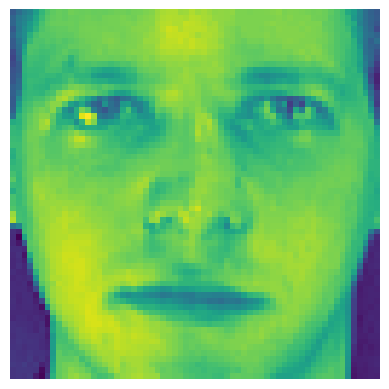

In [29]:
plt.imshow(X_olivetti[0].reshape(x_square_len, x_square_len))
plt.axis("off")
plt.show()